In [1]:
# Importing the needed libraries

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import pprint
import csv
import seaborn as sns 

%matplotlib inline 


In [2]:
# import Scikit-learn libraries
from sklearn import linear_model
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.utils import shuffle

***

### In here we are playing with the Normal data

In [3]:
# load one file data from TE_process folder

# with open('C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\TE_process\\d00.dat') as csvfile:
#     reader = csvfile.readlines()
#     #for line in reader:
#     #    lines.append(line)

#test=pd.read_csv('C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\TE_process\\d00.dat',sep='\s+',header=None)  # use Regex for separator

test=pd.read_csv('C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\TE_process\\d00.dat',header=None,delim_whitespace=True)   #using the delim parametr


In [4]:
label=['XMEAS_1','XMEAS_2','XMEAS_3','XMEAS_4','XMEAS_5','XMEAS_6','XMEAS_7','XMEAS_8','XMEAS_9','XMEAS_10','XMEAS_11','XMEAS_12','XMEAS_13','XMEAS_14','XMEAS_15','XMEAS_16','XMEAS_17','XMEAS_18','XMEAS_19','XMEAS_20','XMEAS_21','XMEAS_22','XMEAS_23','XMEAS_24','XMEAS_25','XMEAS_26','XMEAS_27','XMEAS_28','XMEAS_29','XMEAS_30','XMEAS_31','XMEAS_32','XMEAS_33','XMEAS_34','XMEAS_35','XMEAS_36','XMEAS_37','XMEAS_38','XMEAS_39','XMEAS_40','XMEAS_41','XMV_1','XMV_2','XMV_3','XMV_4','XMV_5','XMV_6','XMV_7','XMV_8','XMV_9','XMV_10','XMV_11'
]

In [5]:
train=test.transpose()

In [6]:
new_train=pd.DataFrame(np.row_stack([train.columns,train.values]),columns=label).drop([0]) #remove columns indeces

In [7]:
new_train.head(3)

,XMEAS_1,XMEAS_2,XMEAS_3,XMEAS_4,XMEAS_5,XMEAS_6,XMEAS_7,XMEAS_8,XMEAS_9,XMEAS_10,...,XMV_2,XMV_3,XMV_4,XMV_5,XMV_6,XMV_7,XMV_8,XMV_9,XMV_10,XMV_11
1,0.24987,3642.6,4539.6,9.2784,27.200,42.248,2704.2,75.492,120.40,0.33990,...,53.617,24.708,62.265,22.224,39.724,41.975,50.223,47.411,41.093,18.351
2,0.25118,3694.8,4513.8,9.2831,27.077,42.736,2705.4,74.628,120.41,0.33560,...,53.926,24.579,61.306,21.975,40.249,34.187,44.741,47.442,41.303,19.831
3,0.25185,3683.5,4504.9,9.4600,26.987,42.245,2705.2,74.315,120.42,0.33761,...,54.032,24.521,60.532,21.640,40.003,43.628,46.032,47.574,41.520,20.426


In [8]:
new_train.shape

(500, 52)

In [9]:
new_train.isnull().sum().head(3) # test for NULL

XMEAS_1    0
XMEAS_2    0
XMEAS_3    0
dtype: int64

In [10]:
new_train.isna().sum().head(3) #test is NA

XMEAS_1    0
XMEAS_2    0
XMEAS_3    0
dtype: int64

In [11]:
#new_train.info()
new_train.describe().transpose().head(3)

,count,mean,std,min,25%,50%,75%,max
XMEAS_1,500.0,0.251138,0.028551,0.18082,0.23059,0.250245,0.269275,0.34285
XMEAS_2,500.0,3663.537800,32.031586,3559.50000,3643.05000,3663.650000,3684.625000,3754.70000
XMEAS_3,500.0,4511.517200,31.724556,4419.80000,4488.57500,4512.300000,4534.700000,4600.70000


## test with one datset

load one fault datset for the testing. we will test fault-01 and build the model around it

In [83]:
#x=plt.hist(new_train.iloc[:,0])
#new_train.iloc[:,0]

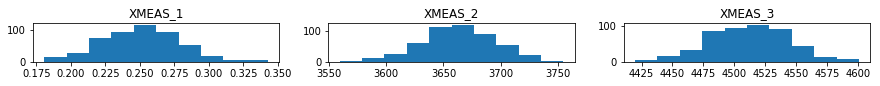

In [12]:
# Plotting the data distribution for all variables

fig=plt.figure(figsize=(15,25))
fig.subplots_adjust(wspace=0.2,hspace=1)
for i in range(0,3):
    plt.subplot(18,3,i+1)
    plt.hist(new_train.iloc[:,i])
    plt.title(new_train.columns[i],loc='center')
    

In [101]:
# boxplots for the data
# fig2=plt.figure(figsize=(15,25))
# fig2.subplots_adjust(wspace=0.2,hspace=1)
# for i in range(0,52):
#     plt.subplot(18,3,i+1)
#     plt.boxplot(new_train.iloc[:,i])
#     plt.title(new_train.columns[i],loc='center')
    

In [14]:
new_train.corr().head()

,XMEAS_1,XMEAS_2,XMEAS_3,XMEAS_4,XMEAS_5,XMEAS_6,XMEAS_7,XMEAS_8,XMEAS_9,XMEAS_10,...,XMV_2,XMV_3,XMV_4,XMV_5,XMV_6,XMV_7,XMV_8,XMV_9,XMV_10,XMV_11
XMEAS_1,1.000000,-0.053143,0.087308,-0.125095,-0.034186,0.096849,0.037762,-0.000808,0.033830,-0.095712,...,-0.157492,0.996026,0.011927,-0.168890,-0.073512,-0.016769,-0.067947,0.019396,-0.008225,0.030122
XMEAS_2,-0.053143,1.000000,-0.080170,0.002743,-0.029287,0.089881,0.040008,0.033844,0.306023,0.029428,...,0.039268,-0.050384,0.031489,-0.017904,0.023872,-0.033287,-0.005640,-0.004802,0.263422,0.015172
XMEAS_3,0.087308,-0.080170,1.000000,-0.064671,0.008701,0.017448,0.172244,0.023339,-0.038357,-0.035725,...,0.122340,0.085266,0.035843,0.076345,-0.021281,-0.009332,-0.045860,-0.108795,0.004047,0.031235
XMEAS_4,-0.125095,0.002743,-0.064671,1.000000,-0.019997,0.000929,0.144486,-0.059398,0.061911,0.055488,...,-0.052638,-0.123406,-0.268673,0.136402,0.028164,-0.042984,0.057462,0.090396,0.062539,0.008467
XMEAS_5,-0.034186,-0.029287,0.008701,-0.019997,1.000000,-0.070870,0.005314,0.041767,-0.003187,0.004439,...,-0.009292,-0.032946,-0.014366,0.193271,0.000694,0.031186,-0.024664,-0.023938,0.002518,0.032227


### Data standardization

In [15]:
#get the columns names
names=new_train.columns

In [16]:
#create a scaler object
scaler=preprocessing.StandardScaler()

In [21]:
# fit the data on the scaler
scal_train=scaler.fit_transform(new_train)

In [22]:
scaled_train=pd.DataFrame(scal_train,columns=names)

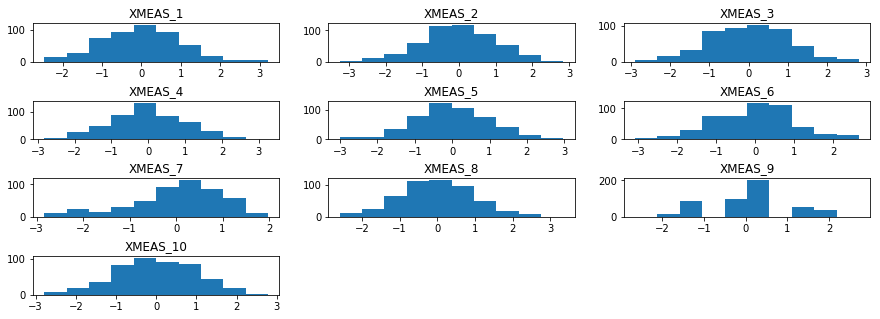

In [24]:
fig=plt.figure(figsize=(15,25))
fig.subplots_adjust(wspace=0.2,hspace=1)
for i in range(0,10):
    plt.subplot(18,3,i+1)
    plt.hist(scaled_train.iloc[:,i])
    plt.title(scaled_train.columns[i],loc='center')

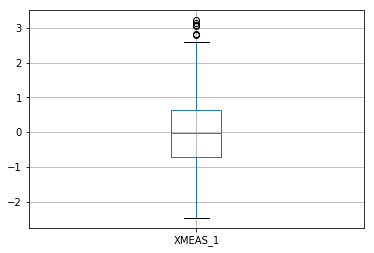

In [29]:
scaled_train.boxplot(["XMEAS_1"])

***
***

## contstract our Anomlay datasets
#### we will only use the 7 step variables - Categorical label is used not numerical

In [27]:
# Import the data

#test=pd.read_csv('C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\TE_process\\d00.dat',header=None,delim_whitespace=True)   #using the delim parametr
#data_label=0

temp_df=[]

label=['XMEAS_1','XMEAS_2','XMEAS_3','XMEAS_4','XMEAS_5','XMEAS_6','XMEAS_7','XMEAS_8','XMEAS_9',\
       'XMEAS_10','XMEAS_11','XMEAS_12','XMEAS_13','XMEAS_14','XMEAS_15','XMEAS_16','XMEAS_17',\
       'XMEAS_18','XMEAS_19','XMEAS_20','XMEAS_21','XMEAS_22','XMEAS_23','XMEAS_24','XMEAS_25','XMEAS_26',\
       'XMEAS_27','XMEAS_28','XMEAS_29','XMEAS_30','XMEAS_31','XMEAS_32','XMEAS_33','XMEAS_34','XMEAS_35',\
       'XMEAS_36','XMEAS_37','XMEAS_38','XMEAS_39','XMEAS_40','XMEAS_41','XMV_1','XMV_2','XMV_3','XMV_4',\
       'XMV_5','XMV_6','XMV_7','XMV_8','XMV_9','XMV_10','XMV_11'
]
DATADIR="C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\processed data\\Random anomalies"

test=os.listdir(DATADIR)

# load the Norml data training and testing
# when we are loading the other anomalies we will not load the Normal anomalies given that the model knew them

#Train_N=pd.read_csv('C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\processed data\\7 first ananomalies\\d00.dat',header=None,delim_whitespace=True).transpose()   #using the delim parametr

# ----- train=test.transpose()

#Test_N=pd.read_csv('C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\processed data\\7 first ananomalies\\d00_te.dat',header=None,delim_whitespace=True)   #using the delim parametr


# final_df=pd.concat([Train_N,Test_N],axis=0,join='outer',ignore_index=True)

# final_df=pd.DataFrame(np.row_stack([final_df.columns,final_df.values]),columns=label).drop([0])

# final_df['label']="Norm"


# temp_df.append(final_df)

#---- final_df=[Train_N,Test_N]

for category in test[0:9]:
    data_load=pd.read_csv(os.path.join(DATADIR,category),header=None,delim_whitespace=True)
    if category[4:6]=='te':
        data_load_tn=data_load[:160]
        data_load_tn=pd.DataFrame(np.row_stack([data_load_tn.columns,data_load_tn.values]),columns=label).drop([0])
        data_load_tn['label']="Norm"
        temp_df.append(data_load_tn)
        
        data_load_tf=data_load[160:]
        data_load_tf=pd.DataFrame(np.row_stack([data_load_tf.columns,data_load_tf.values]),columns=label).drop([0])
        data_load_tf['label']=[category[0:3]]*data_load_tf.shape[0]
        temp_df.append(data_load_tf)
    else:
        data_load_tr=pd.DataFrame(np.row_stack([data_load.columns,data_load.values]),columns=label).drop([0])
        data_load_tr['label']=[category[0:3]]*data_load_tr.shape[0]
        temp_df.append(data_load_tr)
        
#----------------------
                  
        
#     data_label=
    
#     final_df.append(data_transf)



#     print(category)
#     print("shape is {}".format(data_transf.shape))

   
    
#     mypath=os.path.join(DATADIR,category) # get to the directory of images 
#     for i in os.listdir(path=mypath):     # listing all items in the dir
#         img_array=cv2.imread(os.path.join(mypath,i),cv2.IMREAD_GRAYSCALE) # cv2.COLOR_BGR2RGB) # by default it reads images into array/matrix
#         plt.imshow(img_array,cmap='gray')
#         #ii+=ii
#         #print(i)
#         #if ii==3:
#         break
#     break

In [3]:
temp_df[2]

In [266]:
#temp_df=[]
# temp_df.append(final_df)

# for category in test[2:30]:
#     data_load=pd.read_csv(os.path.join(DATADIR,category),header=None,delim_whitespace=True)
#     if category[4:6]=='te':
#         data_load_tn=data_load[:160]
#         data_load_tn=pd.DataFrame(np.row_stack([data_load_tn.columns,data_load_tn.values]),columns=label).drop([0])
#         data_load_tn['label']=0
#         temp_df.append(data_load_tn)
        
#         data_load_tf=data_load[160:]
#         data_load_tf=pd.DataFrame(np.row_stack([data_load_tf.columns,data_load_tf.values]),columns=label).drop([0])
#         data_load_tf['label']=[int(category[2])]*data_load_tf.shape[0]
#         temp_df.append(data_load_tf)
#     else:
#         data_load_tr=pd.DataFrame(np.row_stack([data_load.columns,data_load.values]),columns=label).drop([0])
#         data_load_tr['label']=[int(category[2])]*data_load_tr.shape[0]
#         temp_df.append(data_load_tr)

In [32]:
# join all the datasets into one
# we have now data of 7 anaomalies + Normal all are labeled  0 = Normal, 1-7 for faults

work_df=pd.concat(temp_df,axis=0,join='outer',ignore_index=True)

In [33]:
# Standardization mean=0 and sd =1

names=work_df.iloc[:,:-1].columns
scaler=preprocessing.StandardScaler()
scal_train=scaler.fit_transform(work_df.iloc[:,:-1])
work_df.iloc[:,:-1]=pd.DataFrame(scal_train,columns=names)

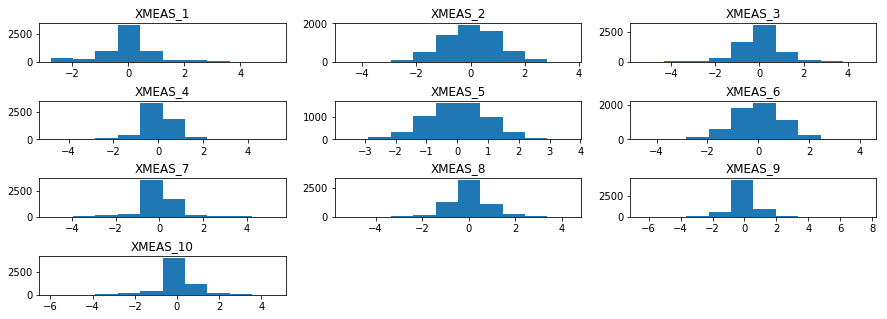

In [34]:
# Plot samples of new data for display

fig=plt.figure(figsize=(15,25))
fig.subplots_adjust(wspace=0.2,hspace=1)
for i in range(0,10):
    plt.subplot(18,3,i+1)
    plt.hist(work_df.iloc[:,i])
    plt.title(work_df.columns[i],loc='center')

#### The graphs above are standardized arround Zero mean and sd=1

In [23]:
work_df.tail()

In [284]:
# Now we randomize the data 
#from sklearn.utils import shuffle


### the random state used in 42 and should be preserved
#### at this stage we sample over all the popolation, i.e. the 7 faults and the Normal state. this is not great approach as we should sample for each dataframe to keep the same proportionality between all the samples
#### The standardization is not done for the fault data is not performed here. also I am using all the 7 faults in the DF. 


In [36]:
# Shuffling the data

work_df_shuffle=shuffle(work_df, random_state=42) 

In [37]:
work_df_shuffle[0:5]

,XMEAS_1,XMEAS_2,XMEAS_3,XMEAS_4,XMEAS_5,XMEAS_6,XMEAS_7,XMEAS_8,XMEAS_9,XMEAS_10,...,XMV_3,XMV_4,XMV_5,XMV_6,XMV_7,XMV_8,XMV_9,XMV_10,XMV_11,label
3315,-0.141567,1.851457,0.140754,-0.067979,-0.215989,1.050031,0.332338,0.198008,0.443862,0.103813,...,-0.150617,-0.768630,0.091794,0.228584,-0.441638,-0.020281,-0.467757,-0.049908,-0.269246,d10
1760,-0.416368,1.273153,-0.027566,0.350494,0.781827,0.072548,-0.232057,0.211058,-0.445073,-0.029358,...,-0.427154,-0.443020,-0.209780,-0.031300,-0.919926,-0.366736,0.128061,-0.311360,-1.039383,d09
4302,-0.376729,1.700125,0.170617,0.164902,0.229046,0.163126,0.105942,-0.295097,-0.445073,-0.372392,...,-0.395346,0.296072,-0.029584,-0.463837,0.436166,-0.392939,-0.601604,-0.213382,0.796499,d10
756,3.702640,-1.086006,-0.820299,-1.827976,1.212808,0.887746,-1.950753,-0.315604,0.888329,2.408146,...,3.701320,-1.829559,-1.452971,2.701322,0.415891,0.701326,1.686231,0.101318,3.230081,d08
4207,0.313614,-0.237466,-0.156521,0.429460,1.414245,-0.576591,0.284508,0.107590,0.888329,0.245013,...,0.292657,1.544065,0.726490,0.028360,0.643236,1.518593,1.253625,0.431461,-0.557723,d10


In [289]:
# final_df=pd.concat([Train_N,Test_N],axis=0,join='outer',ignore_index=True)

# final_df=pd.DataFrame(np.row_stack([final_df.columns,final_df.values]),columns=label).drop([0])

# #final_df.

In [300]:
# work_df_shuffle=work_df_shuffle.reset_index(drop=True)

In [11]:
# work_df_shuffle.head()

In [38]:
# export the whole construcetd data the CSV for future use
work_df_shuffle.to_csv("C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\processed data\\export_random_anom_std_cat.csv",index=False)

### Create binary class for the random anomalies

In [14]:
# Import the data

#test=pd.read_csv('C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\TE_process\\d00.dat',header=None,delim_whitespace=True)   #using the delim parametr
#data_label=0

temp_df=[]

label=['XMEAS_1','XMEAS_2','XMEAS_3','XMEAS_4','XMEAS_5','XMEAS_6','XMEAS_7','XMEAS_8','XMEAS_9',\
       'XMEAS_10','XMEAS_11','XMEAS_12','XMEAS_13','XMEAS_14','XMEAS_15','XMEAS_16','XMEAS_17',\
       'XMEAS_18','XMEAS_19','XMEAS_20','XMEAS_21','XMEAS_22','XMEAS_23','XMEAS_24','XMEAS_25','XMEAS_26',\
       'XMEAS_27','XMEAS_28','XMEAS_29','XMEAS_30','XMEAS_31','XMEAS_32','XMEAS_33','XMEAS_34','XMEAS_35',\
       'XMEAS_36','XMEAS_37','XMEAS_38','XMEAS_39','XMEAS_40','XMEAS_41','XMV_1','XMV_2','XMV_3','XMV_4',\
       'XMV_5','XMV_6','XMV_7','XMV_8','XMV_9','XMV_10','XMV_11'
]
DATADIR="C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\processed data\\Random anomalies"

test=os.listdir(DATADIR)


for category in test[0:9]:
    data_load=pd.read_csv(os.path.join(DATADIR,category),header=None,delim_whitespace=True)
    if category[4:6]=='te':
        data_load_tn=data_load[:160]
        data_load_tn=pd.DataFrame(np.row_stack([data_load_tn.columns,data_load_tn.values]),columns=label).drop([0])
        data_load_tn['label']="Norm"
        temp_df.append(data_load_tn)
        
        data_load_tf=data_load[160:]
        data_load_tf=pd.DataFrame(np.row_stack([data_load_tf.columns,data_load_tf.values]),columns=label).drop([0])
        data_load_tf['label']="Fault"
        temp_df.append(data_load_tf)
    else:
        data_load_tr=pd.DataFrame(np.row_stack([data_load.columns,data_load.values]),columns=label).drop([0])
        data_load_tr['label']="Fault"
        temp_df.append(data_load_tr)
        

In [17]:
# Show the data list sample
temp_df[2]

In [18]:
# join all the datasets into one
work_df=pd.concat(temp_df,axis=0,join='outer',ignore_index=True)

In [21]:
# Standardization mean=0 and sd =1

names=work_df.iloc[:,:-1].columns
scaler=preprocessing.StandardScaler()
scal_train=scaler.fit_transform(work_df.iloc[:,:-1])
work_df.iloc[:,:-1]=pd.DataFrame(scal_train,columns=names)

In [20]:
#work_df.iloc[1,:]

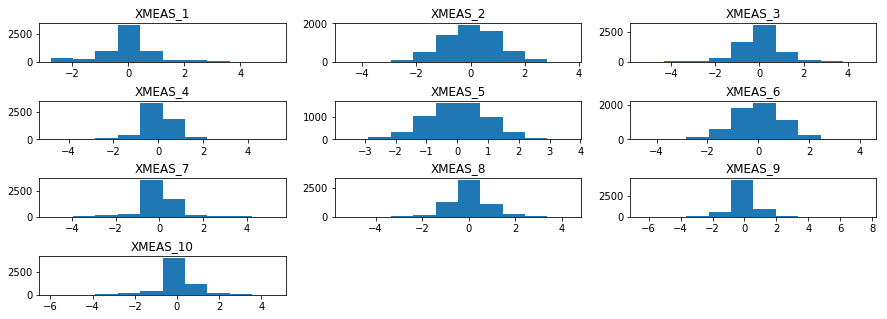

In [22]:
# Plot samples of new data for display

fig=plt.figure(figsize=(15,25))
fig.subplots_adjust(wspace=0.2,hspace=1)
for i in range(0,10):
    plt.subplot(18,3,i+1)
    plt.hist(work_df.iloc[:,i])
    plt.title(work_df.columns[i],loc='center')

In [25]:
#work_df.tail()

In [26]:

# Randomize the data --> Shuffling the data

work_df_shuffle=shuffle(work_df, random_state=42) 

In [30]:
#work_df_shuffle[0:50]

In [31]:
# export the whole construcetd data the CSV for future use
work_df_shuffle.to_csv("C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\processed data\\Faults processed\\Cross Project Valudation Data\\Python\\new_export_random_anom_std_binary.csv",index=False)

### Create Binary Class for the 7 Anomalies

In [32]:
# Import the data

#test=pd.read_csv('C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\TE_process\\d00.dat',header=None,delim_whitespace=True)   #using the delim parametr
#data_label=0

temp_df=[]

label=['XMEAS_1','XMEAS_2','XMEAS_3','XMEAS_4','XMEAS_5','XMEAS_6','XMEAS_7','XMEAS_8','XMEAS_9',\
       'XMEAS_10','XMEAS_11','XMEAS_12','XMEAS_13','XMEAS_14','XMEAS_15','XMEAS_16','XMEAS_17',\
       'XMEAS_18','XMEAS_19','XMEAS_20','XMEAS_21','XMEAS_22','XMEAS_23','XMEAS_24','XMEAS_25','XMEAS_26',\
       'XMEAS_27','XMEAS_28','XMEAS_29','XMEAS_30','XMEAS_31','XMEAS_32','XMEAS_33','XMEAS_34','XMEAS_35',\
       'XMEAS_36','XMEAS_37','XMEAS_38','XMEAS_39','XMEAS_40','XMEAS_41','XMV_1','XMV_2','XMV_3','XMV_4',\
       'XMV_5','XMV_6','XMV_7','XMV_8','XMV_9','XMV_10','XMV_11'
]

DATADIR="C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\processed data\\7 first ananomalies"

test=os.listdir(DATADIR)

# load the Norml data training and testing
# when we are loading the other anomalies we will not load the Normal anomalies given that the model knew them

Train_N=pd.read_csv('C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\processed data\\7 first ananomalies\\d00.dat',header=None,delim_whitespace=True).transpose()   #using the delim parametr

# ----- train=test.transpose()

Test_N=pd.read_csv('C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\processed data\\7 first ananomalies\\d00_te.dat',header=None,delim_whitespace=True)   #using the delim parametr


final_df=pd.concat([Train_N,Test_N],axis=0,join='outer',ignore_index=True)

final_df=pd.DataFrame(np.row_stack([final_df.columns,final_df.values]),columns=label).drop([0])

final_df['label']="Norm"


temp_df.append(final_df)

#---- final_df=[Train_N,Test_N]

for category in test[2:15]:
    data_load=pd.read_csv(os.path.join(DATADIR,category),header=None,delim_whitespace=True)
    if category[4:6]=='te':
        data_load_tn=data_load[:160]
        data_load_tn=pd.DataFrame(np.row_stack([data_load_tn.columns,data_load_tn.values]),columns=label).drop([0])
        data_load_tn['label']="Norm"
        temp_df.append(data_load_tn)
        
        data_load_tf=data_load[160:]
        data_load_tf=pd.DataFrame(np.row_stack([data_load_tf.columns,data_load_tf.values]),columns=label).drop([0])
        data_load_tf['label']="Fault"
        temp_df.append(data_load_tf)
    else:
        data_load_tr=pd.DataFrame(np.row_stack([data_load.columns,data_load.values]),columns=label).drop([0])
        data_load_tr['label']="Fault"
        temp_df.append(data_load_tr)

In [61]:
temp_df[3].shape

(800, 53)

In [63]:
# Show the data list sample
temp_df[2]

In [64]:
# join all the datasets into one
work_df=pd.concat(temp_df,axis=0,join='outer',ignore_index=True)

In [65]:
work_df.shape

(10580, 53)

In [69]:
#work_df.tail()

,XMEAS_1,XMEAS_2,XMEAS_3,XMEAS_4,XMEAS_5,XMEAS_6,XMEAS_7,XMEAS_8,XMEAS_9,XMEAS_10,...,XMV_3,XMV_4,XMV_5,XMV_6,XMV_7,XMV_8,XMV_9,XMV_10,XMV_11,label
10575,-0.342108,-0.758930,-0.093570,-0.125114,2.011143,1.119374,-0.434009,0.283087,-0.068447,-0.289779,...,-0.685457,1.297363,-0.058860,-0.086905,0.697881,0.595145,-0.112953,-0.417044,-0.449682,Fault
10576,-0.206978,-0.449107,0.268998,0.191562,-1.007345,-0.856482,-0.393612,-0.747028,0.438555,-0.246496,...,-0.582277,1.002316,-0.103849,-0.074861,-2.256276,1.156618,-0.106241,-0.369781,-0.321868,Fault
10577,-0.207919,-0.900209,0.098330,0.708206,-1.575827,-0.763927,-0.387061,-0.519630,0.185054,-0.215244,...,-0.581590,0.901689,-0.134598,-0.101099,-0.891276,-0.797505,-0.121935,-0.372212,-0.339475,Fault
10578,-0.379790,0.574549,0.090980,-0.072097,-1.279009,-0.852458,-0.373959,-0.112587,0.354055,-0.206650,...,-0.707234,1.186673,-0.094650,-0.031417,1.037812,-0.544135,-0.109118,-0.310361,-0.359218,Fault
10579,-0.375532,0.346519,0.220819,-0.089532,-2.370696,-1.403766,-0.393612,-0.996030,0.354055,-0.199619,...,-0.710267,1.267934,-0.126406,-0.037331,1.123674,1.510188,-0.109168,-0.361004,-0.149706,Fault


In [66]:
# Standardization mean=0 and sd =1

names=work_df.iloc[:,:-1].columns
scaler=preprocessing.StandardScaler()
scal_train=scaler.fit_transform(work_df.iloc[:,:-1])
work_df.iloc[:,:-1]=pd.DataFrame(scal_train,columns=names)

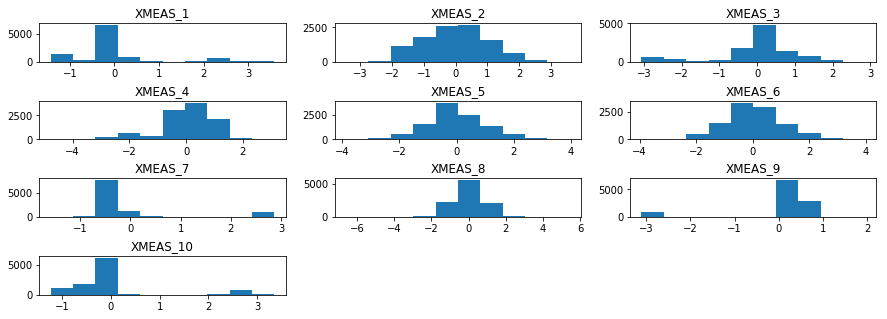

In [67]:
# Plot samples of new data for display

fig=plt.figure(figsize=(15,25))
fig.subplots_adjust(wspace=0.2,hspace=1)
for i in range(0,10):
    plt.subplot(18,3,i+1)
    plt.hist(work_df.iloc[:,i])
    plt.title(work_df.columns[i],loc='center')

In [70]:
# Randomize the data --> Shuffling the data

work_df_shuffle=shuffle(work_df, random_state=42) 

In [72]:
#work_df_shuffle.head(20)

In [73]:
# export the whole construcetd data the CSV for future use
work_df_shuffle.to_csv("C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\processed data\\Faults processed\\Cross Project Valudation Data\\Python\\new_export_7_anom_std_binary.csv",index=False)

In [ ]:
# (X_train,X_test,Y_train,Y_test)=train_test_split(work_df_shuffle,work_label,test_size=0.2)

### creating Training and testing sets 70/30 split



In [74]:
# define the labels

#work_label=work_df_shuffle['label']

In [75]:
#work_df_shuffle.to_csv("C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\processed data\\export_7_anom.csv",index=False)

In [76]:
# get the training and the testing datasets

#(X_train,X_test,Y_train,Y_test)=train_test_split(work_df_shuffle,work_label,test_size=0.2)

In [82]:
# print (X_train.shape, Y_train.shape)
# print (X_test.shape, Y_test.shape)

In [368]:
# from sklearn.svm import SVC

# svm_model_linear=SVC(kernel='linear',C=1).fit(X_train,Y_train)


In [369]:
# svm_predictions=svm_model_linear.predict(X_test)

In [370]:
# model accuracy
# accuracy=svm_model_linear.score(X_test,Y_test)

In [371]:
# from sklearn.metrics import confusion_matrix

In [372]:
# cm=confusion_matrix(Y_test,svm_predictions)

In [77]:
# cm

In [329]:
np.savetxt('C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\processed data\\labelexo1.txt',Y_test)

In [78]:
# accuracy

In [79]:
# decision tree classifier
# from sklearn.tree import DecisionTreeClassifier 

# dtree_model = DecisionTreeClassifier(max_depth = 10).fit(X_train, Y_train) 
# dtree_predictions = dtree_model.predict(X_test) 

In [80]:
# cm=confusion_matrix(Y_test,dtree_predictions)

In [81]:
# cm

------------------------------
-----------------------------

###  <font color=red> we will address one faults - fault-1 here </font>

In [433]:
# Create the list of all fault dataframes

"""
temp_df=[]

label=['XMEAS_1','XMEAS_2','XMEAS_3','XMEAS_4','XMEAS_5','XMEAS_6','XMEAS_7','XMEAS_8','XMEAS_9',\
       'XMEAS_10','XMEAS_11','XMEAS_12','XMEAS_13','XMEAS_14','XMEAS_15','XMEAS_16','XMEAS_17',\
       'XMEAS_18','XMEAS_19','XMEAS_20','XMEAS_21','XMEAS_22','XMEAS_23','XMEAS_24','XMEAS_25','XMEAS_26',\
       'XMEAS_27','XMEAS_28','XMEAS_29','XMEAS_30','XMEAS_31','XMEAS_32','XMEAS_33','XMEAS_34','XMEAS_35',\
       'XMEAS_36','XMEAS_37','XMEAS_38','XMEAS_39','XMEAS_40','XMEAS_41','XMV_1','XMV_2','XMV_3','XMV_4',\
       'XMV_5','XMV_6','XMV_7','XMV_8','XMV_9','XMV_10','XMV_11'
]
DATADIR="C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\processed data\\7 first ananomalies"

test=os.listdir(DATADIR)

# load the Norml data training and testing

Train_N=pd.read_csv('C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\processed data\\7 first ananomalies\\d00.dat',header=None,delim_whitespace=True).transpose()   #using the delim parametr
#train=test.transpose()
Test_N=pd.read_csv('C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\processed data\\7 first ananomalies\\d00_te.dat',header=None,delim_whitespace=True)   #using the delim parametr


final_df=pd.concat([Train_N,Test_N],axis=0,join='outer',ignore_index=True)

final_df=pd.DataFrame(np.row_stack([final_df.columns,final_df.values]),columns=label).drop([0])

final_df['label']='Norm'


temp_df.append(final_df)

fault_count=0
#final_df=[Train_N,Test_N]

for category in test[2:16]:
        
    data_load=pd.read_csv(os.path.join(DATADIR,category),header=None,delim_whitespace=True)
    if category[4:6]=='te':
        data_load_tn=data_load[:160]
        data_load_tn=pd.DataFrame(np.row_stack([data_load_tn.columns,data_load_tn.values]),columns=label).drop([0])
        data_load_tn['label']='Norm'
        temp_df.append(data_load_tn)
        
        data_load_tf=data_load[160:]
        data_load_tf=pd.DataFrame(np.row_stack([data_load_tf.columns,data_load_tf.values]),columns=label).drop([0])
        data_load_tf['label']=[category[0:3]]*data_load_tf.shape[0]
        temp_df.append(data_load_tf)
         
        # -- New to create 1 file for each faulty data
        # -- the data is standardized as well 
        
        fault_count+=1
        work_df=pd.concat(temp_df,axis=0,join='outer',ignore_index=True) # create the DF
        
        #work_df_lab=work_df['label']
        names=work_df.iloc[:,:-1].columns
        scaler=preprocessing.StandardScaler()
        scal_train=scaler.fit_transform(work_df.iloc[:,:-1])
        work_df.iloc[:,:-1]=pd.DataFrame(scal_train,columns=names)
        
        work_df=shuffle(work_df, random_state=42) 
        work_df.to_csv("C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\processed data\\Faults processed\\fault0%s.csv" %fault_count,index=False)
        temp_df=[]
        temp_df.append(final_df)
        #-----------------
    else:
        data_load_tr=pd.DataFrame(np.row_stack([data_load.columns,data_load.values]),columns=label).drop([0])
        data_load_tr['label']=[category[0:3]]*data_load_tr.shape[0]
        temp_df.append(data_load_tr)
 """


In [434]:
#temp_df[2].tail()
# fault_count = 2
# temp_df[1].to_csv("C:\\Users\\elmor\\My project\\capstonre-2019\\Ryerson-data-Science-certificate-capstone\\data\\processed data\\fault%s.csv" %fault_count,index=False)
#work_df.iloc[:,:-1]


In [ ]:
# concatenate into one dataframe per fault
